# Data Science Main Models (Basics)

## 1. Linear Regression

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("DS models practice - Sheet1.csv")

df

,Customer_ID,Age,Gender,Annual_Income,Browsing_Time,Items_Viewed,Added_to_Cart,Purchased,Purchase_Amount,Customer_Satisfaction,Category
0,1,25,Male,40000,15,5,1,1,50,4,Electronics
1,2,34,Female,55000,20,7,0,0,0,3,Fashion
2,3,45,Male,70000,5,3,1,1,100,5,Home Decor
3,4,29,Female,48000,30,8,1,0,0,2,Electronics
4,5,41,Male,60000,10,4,1,1,75,5,Fashion
5,6,38,Female,52000,18,6,0,1,60,3,Electronics
6,7,50,Male,80000,7,5,1,1,90,4,Home Decor
7,8,23,Female,35000,25,10,1,0,0,2,Fashion
8,9,31,Male,45000,22,7,1,1,65,4,Electronics
9,10,27,Female,40000,12,4,0,0,0,3,Fashion


Linear Regression (Predicting Purchase_Amount)

Independent variables: Age, Annual_Income, Browsing_Time, Items_Viewed
Target variable: Purchase_Amount

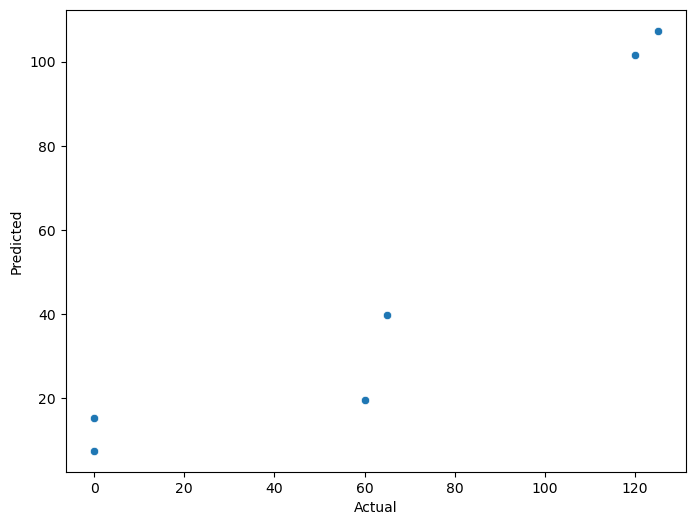

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df[["Age","Annual_Income","Items_Viewed"]]
y = df["Purchase_Amount"]

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
predicted_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.scatterplot(x = y_test, y= y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


## 2. Logistic Regression

Logistic Regression (Predicting whether a customer makes a purchase - Purchased)

Independent variables: Gender, Age, Browsing_Time, Items_Viewed, Added_to_Cart
Target variable: Purchased (0 or 1)

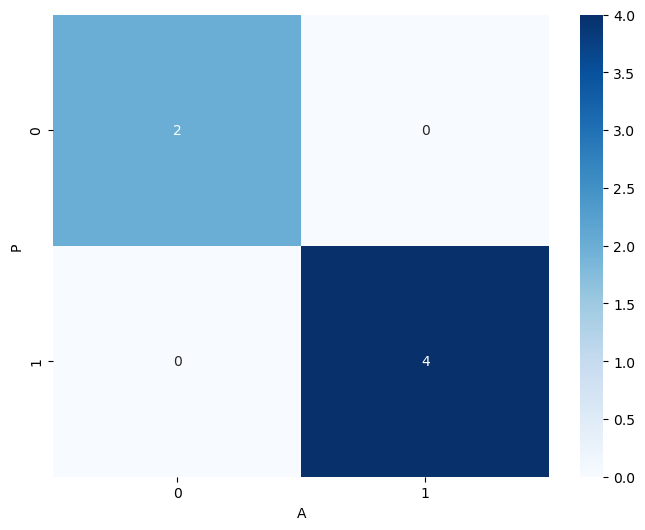

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df["Gender"] = df["Gender"].map({Male:0,Female:1})

X = df[["Age","Items_Viewed","Added_to_Cart"]]
y = df["Purchased"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

conf_mat = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("A")
plt.ylabel("P")
plt.show()



## 3. Decision trees and random forests

Decision Trees & Random Forests (Customer segmentation based on Customer_Satisfaction)

Predict Customer_Satisfaction using Browsing_Time, Purchase_Amount, Items_Viewed

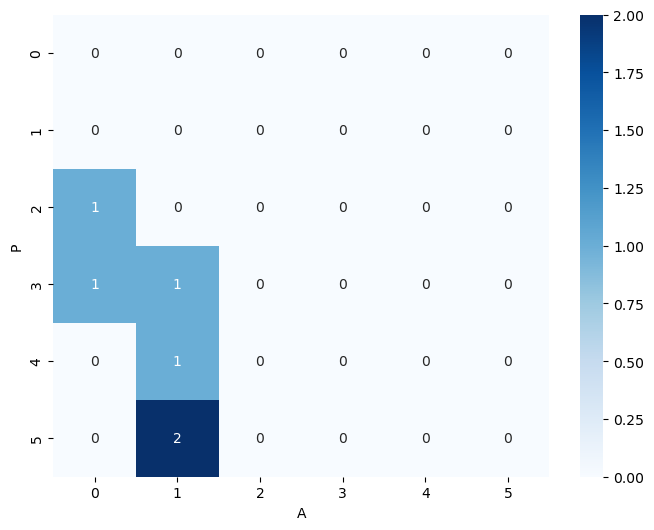

C:\Users\micro\AppData\Local\Temp\ipykernel_22892\4018329635.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=features_df, palette="coolwarm")


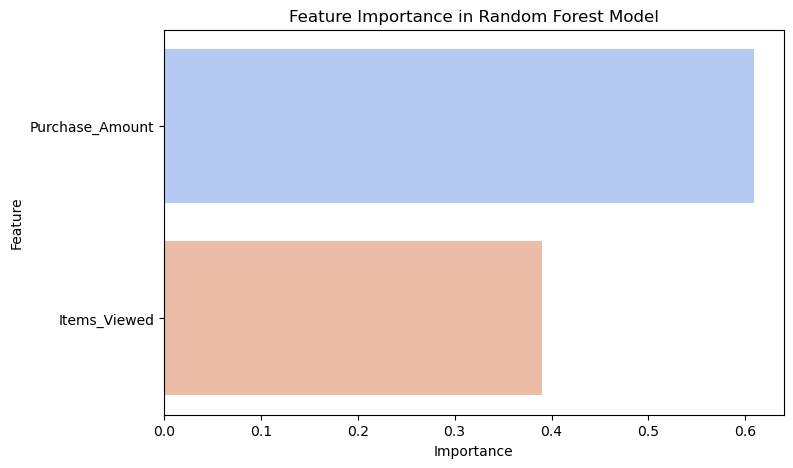

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df[["Purchase_Amount","Items_Viewed"]]
y = df["Customer_Satisfaction"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train,y_train)

# rf_model = RandomForestClassifier(random_state=42, max_depth=5)
# rf_model.fit(X_train,y_train)

y_pred_dt = dt_model.predict(X_test)
# y_pred_rf = rf_model.predict(X_test)

conf_mat = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt = "d", cmap= "Blues")
plt.xlabel("A")
plt.ylabel("P")
plt.show()

# Feature importance

feature_importance = dt_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=features_df, palette="coolwarm")
plt.title("Feature Importance in Random Forest Model")
plt.show()

## 4. Gradient Boosting

Gradient Boosting (XGBoost, LightGBM, CatBoost for improved classification/regression)

Can be applied for predicting Purchase_Amount or Purchased with high accuracy.

For Classification

C:\Users\micro\ansel\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost Classification Performance:
Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



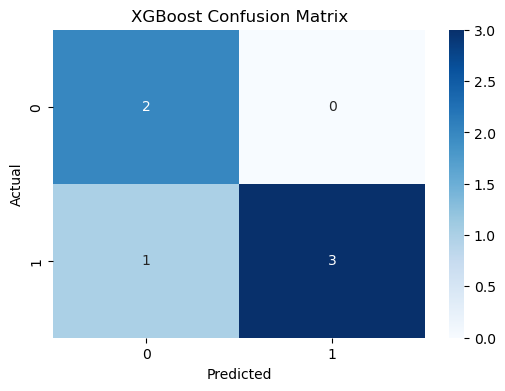

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

# Import Gradient Boosting Libraries
from xgboost import XGBClassifier, XGBRegressor
#  from lightgbm import LGBMClassifier, LGBMRegressor
#  from catboost import CatBoostClassifier, CatBoostRegressor

# df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Features 
features = ['Age', 'Items_Viewed', 'Added_to_Cart']

# Targets
target_classification = 'Purchased'      # Classification: Predict if customer will purchase
# target_regression = 'Purchase_Amount'    # Regression: Predict purchase amount

X_class = df[features]
y_class = df[target_classification]


X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)


xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_class, y_train_class)
y_pred_xgb = xgb_clf.predict(X_test_class)

def evaluate_classification(model_name, y_true, y_pred):
    print(f"\n {model_name} Classification Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Confusion Matrix Visualization
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Evaluate all models
evaluate_classification("XGBoost", y_test_class, y_pred_xgb)
# evaluate_classification("LightGBM", y_test_class, y_pred_lgb)
# evaluate_classification("CatBoost", y_test_class, y_pred_cat)




For regression

In [50]:
# Define features and target variable for regression
X_reg = df[features]
y_reg = df[target_regression]

# Split data (80% training, 20% testing)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)
y_pred_xgb_reg = xgb_reg.predict(X_test_reg)


# Function to print regression metrics
def evaluate_regression(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n📈 {model_name} Regression Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

# Evaluate all models
evaluate_regression("XGBoost", y_test_reg, y_pred_xgb_reg)
# evaluate_regression("LightGBM", y_test_reg, y_pred_lgb_reg)
# evaluate_regression("CatBoost", y_test_reg, y_pred_cat_reg)



📈 XGBoost Regression Performance:
Mean Absolute Error (MAE): 31.64
Mean Squared Error (MSE): 1168.59
Root Mean Squared Error (RMSE): 34.18
R² Score: 0.53


## 5. Neural Networks

Neural Networks (Predicting purchase likelihood or satisfaction score)

Can be used for multi-layer perceptron (MLP) to predict Purchased or Customer_Satisfaction.

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Encoding categorical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df = pd.get_dummies(df, columns=['Category'], drop_first=True) 

# this last one does a 0/1 partition per element of category, so:

# Category (values from the column example)
#         A
#         B
#         C
#         A
#         B

# Category_B  Category_C
#           0          0
#           1          0
#           0          1
#           0          0
#           1          0   it converts it to zeros and ones

# Selecting Features and Target

df_X = df.drop(columns=['Customer_ID', 'Purchased', 'Customer_Satisfaction'])
X = df_X
y = df['Purchased']  # or df['Customer_Satisfaction'] for the satisfaction prediction


X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

accuracy = accuracy_score(y_test, y_pred)

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("What's good my boy")
plt.xlabel("A")
plt.ylabel("P")
plt.show()


KeyError: "None of [Index(['Category'], dtype='object')] are in the [columns]"

## 6. K-means clustering $\alpha^2$

Clustering (K-Means, DBSCAN for Customer Segmentation)

Use Age, Annual_Income, Browsing_Time to create customer segments.

C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

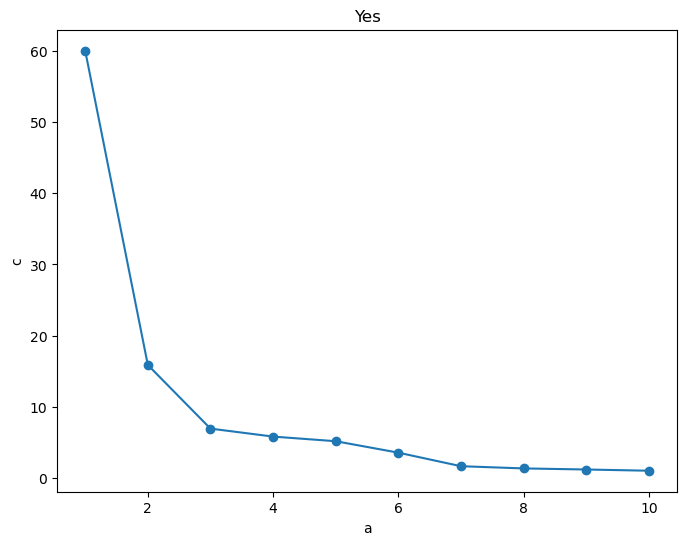

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

X = df[["Age","Annual_Income"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11), inertia, marker='o')
plt.title("Yes")
plt.xlabel("a")
plt.ylabel("c")
plt.show()

From the elbow plot, you will see the "elbow" point where the inertia decreases sharply, indicating the optimal number of clusters. It's at 3.

C:\Users\micro\ansel\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


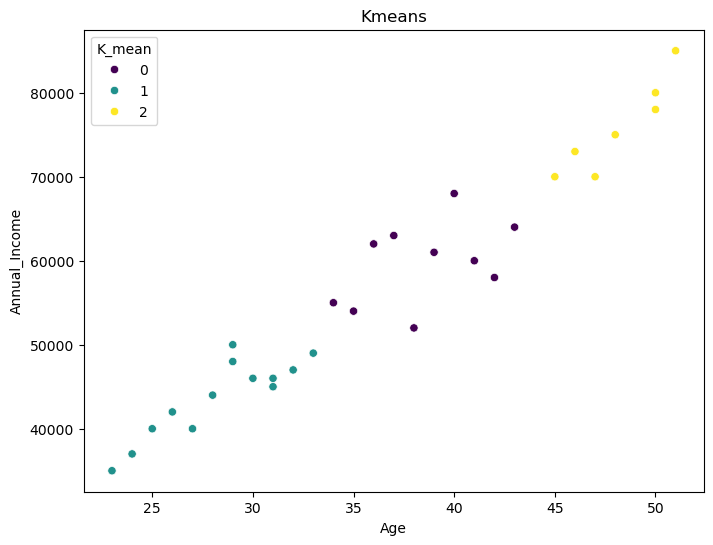

In [15]:
kmeans= KMeans(n_clusters = 3, random_state=42)
kmeans.fit(X_scaled)

df["K_mean"] = kmeans.labels_

plt.figure(figsize=(8,6))
sns.scatterplot(x="Age",y="Annual_Income",data=df, hue="K_mean", palette="viridis")
plt.title("Kmeans")
plt.show()

DBscan  (points marked with -1 are considered noise or outliers)

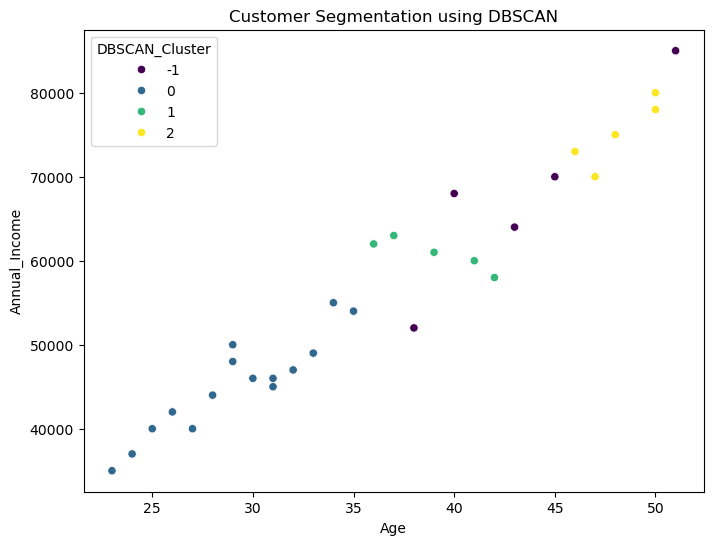

In [23]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualizing the DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual_Income', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation using DBSCAN')
plt.show()

PCA

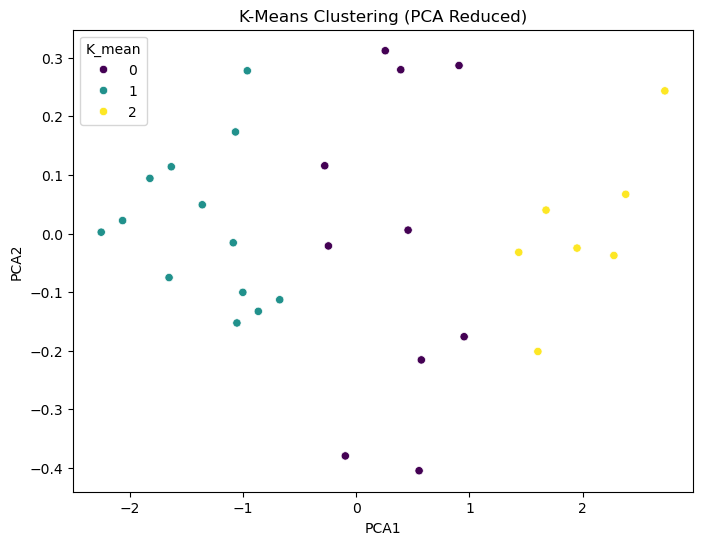

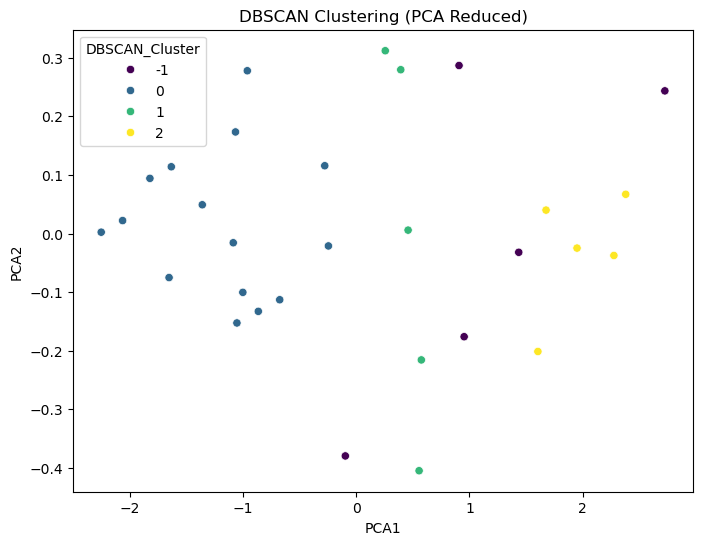

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plotting the KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='K_mean', data=df, palette='viridis')
plt.title('K-Means Clustering (PCA Reduced)')
plt.show()

# Plotting the DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering (PCA Reduced)')
plt.show()